In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
experiment_dir2 = '/afs/inf.ed.ac.uk/user/s18/s1802438/MLP-git/MLP/VGG_08/result_outputs'
experiment_dir = '/afs/inf.ed.ac.uk/user/s18/s1802438/MLP-git/MLP/VGG_38_experiment/result_outputs'

In [2]:
def collect_experiment_dicts(target_dir, test_flag=False):
    experiment_dicts = dict()
    for subdir, dir, files in os.walk(target_dir):
        
        for file in files:
            filepath = None
            if not test_flag:
                if file == 'summary.csv':
                    filepath = os.path.join(subdir, file)
            
            elif test_flag:
                if file == 'test_summary.csv':
                    filepath = os.path.join(subdir, file)
            
            if filepath is not None:
                
                with open(filepath, 'r') as read_file:
                    lines = read_file.readlines()
                    
                current_experiment_dict = {key: [] for key in lines[0].replace('\n', '').split(',')}
                idx_to_key = {idx: key for idx, key in enumerate(lines[0].replace('\n', '').split(','))}
                
                for line in lines[1:]:
                    for idx, value in enumerate(line.replace('\n', '').split(',')):
                        current_experiment_dict[idx_to_key[idx]].append(float(value))
                
                experiment_dicts[subdir.split('/')[-2]] = current_experiment_dict
                
    return experiment_dicts
                
            

In [3]:
result_dict = collect_experiment_dicts(target_dir=experiment_dir)
result_dict2 = collect_experiment_dicts(target_dir=experiment_dir2)
result_dict = {**result_dict, **result_dict2}
print(result_dict)
for key, value in result_dict.items():
    print(key, list(value.keys()))

{'VGG_38_experiment': {'train_acc': [0.044673684210526324, 0.08475789473684212, 0.1234315789473684, 0.16692631578947367, 0.2076842105263158, 0.24418947368421054, 0.2791368421052632, 0.3097473684210526, 0.3406736842105263, 0.3706736842105263, 0.38593684210526313, 0.40795789473684213, 0.42381052631578947, 0.4425263157894737, 0.45930526315789477, 0.4701894736842106, 0.4831578947368421, 0.4980631578947369, 0.5085894736842106, 0.5181263157894738, 0.5273263157894736, 0.5349473684210526, 0.5469263157894736, 0.5522947368421053, 0.5616842105263157, 0.568, 0.5722105263157894, 0.5809684210526317, 0.5913052631578948, 0.5954947368421053, 0.6013052631578948, 0.6055999999999999, 0.6118526315789473, 0.6199368421052632, 0.6271999999999999, 0.6287578947368421, 0.6343578947368421, 0.6377052631578948, 0.6447999999999999, 0.6450105263157895, 0.6535789473684209, 0.6584210526315789, 0.6614315789473685, 0.6637052631578947, 0.6700842105263158, 0.6733473684210527, 0.6789684210526316, 0.6857263157894736, 0.68791

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_result_graphs(plot_name, stats, keys_to_plot, notebook=True):
    
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_loss', 'val_loss']:
            item = stats[name][k]
            ax_1.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_1.legend(loc=0)
    ax_1.set_ylabel('Loss')
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for name in keys_to_plot:
        for k in ['train_acc', 'val_acc']:
            item = stats[name][k]
            ax_2.plot(np.arange(0, len(item)), 
                      item, label='{}_{}'.format(name, k))
            
    ax_2.legend(loc=0)
    ax_2.set_ylabel('Accuracy')
    ax_2.set_xlabel('Epoch number')
    
    fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
    
    fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
from matplotlib.backends.backend_pdf import PdfPages
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = 'multi.pdf'
save_multi_image(filename)
    
    

/tmp/ipykernel_76625/665802210.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
/tmp/ipykernel_76625/665802210.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_1.savefig('../data/{}_loss_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
/tmp/ipykernel_76625/665802210.py:37: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  fig_2.savefig('../data/{}_accuracy_performance.pdf'.format(plot_name), dpi=None, facecolor='w', edgecolor='w',
/tmp/ipykernel_76625/665802210.py:37: MatplotlibDeprecationWarning: savefig() got unexpected

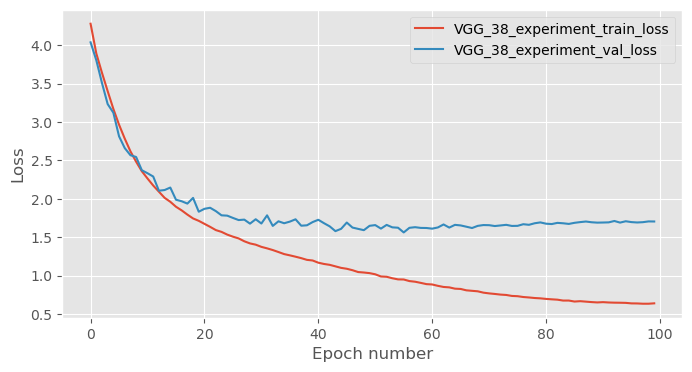

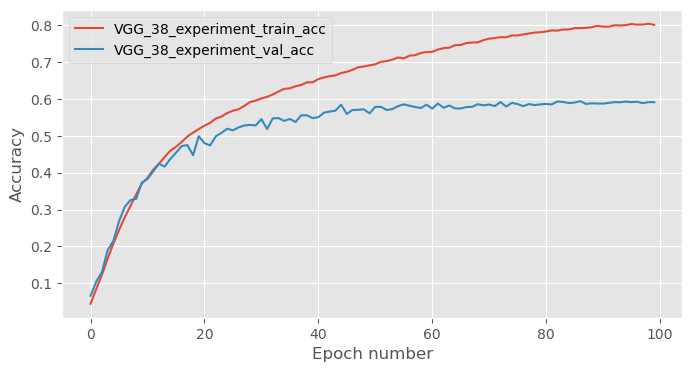

In [6]:
plot_result_graphs('problem_model', result_dict, keys_to_plot=['VGG_38_experiment'])

In [10]:
from matplotlib.backends.backend_pdf import PdfPages
def save_multi_image(filename):
    pp = PdfPages(filename)
    fig_nums = plt.get_fignums()
    figs = [plt.figure(n) for n in fig_nums]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()

filename = 'multi.pdf'
save_multi_image(filename)